In [1]:
import pandas_datareader as pdr
import pandas_datareader.data as web
import datetime
import numpy as np
import pandas as pdr
import matplotlib.pyplot as plt
import mplcyberpunk

In [30]:
petra = web.get_data_yahoo( 'PETR4.SA', start=datetime.datetime(2018, 1, 1), end=datetime.datetime(2022, 10, 26) )
petra

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,16.549999,16.190001,16.190001,16.549999,33461800.0,8.335219
2018-01-03,16.719999,16.370001,16.490000,16.700001,55940900.0,8.410767
2018-01-04,16.959999,16.620001,16.780001,16.730000,37064900.0,8.425875
2018-01-05,16.860001,16.570000,16.700001,16.830000,26958200.0,8.476238
2018-01-08,17.030001,16.709999,16.740000,17.030001,28400000.0,8.576967
...,...,...,...,...,...,...
2022-10-20,36.549999,35.770000,36.099998,36.470001,114347400.0,36.470001
2022-10-21,38.389999,36.389999,36.450001,37.720001,139601400.0,37.720001
2022-10-24,36.820000,34.230000,36.500000,34.250000,142110900.0,34.250000


<AxesSubplot: xlabel='Date'>

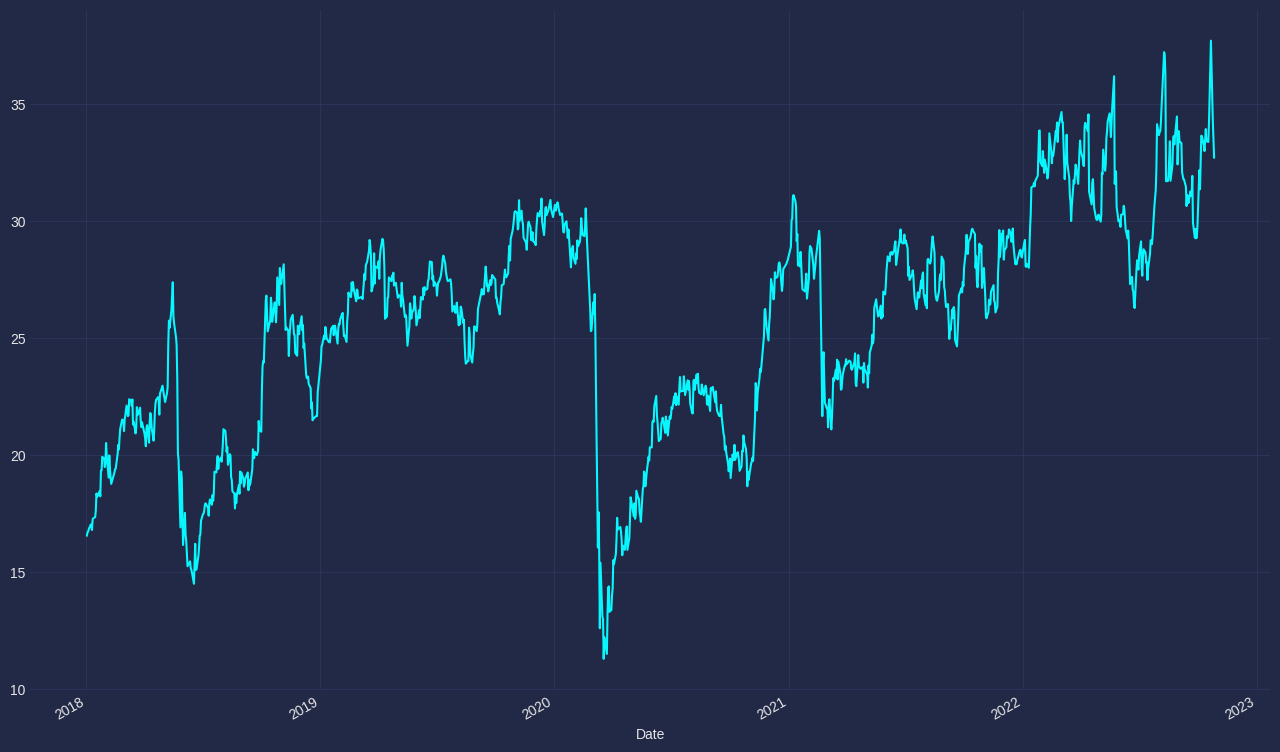

In [31]:
petra['Close'].plot( figsize=(16,10) )

In [32]:
petra_sa = petra.loc['2021-01':'2022-10'].copy()
petra_sa.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-10-20,36.549999,35.770000,36.099998,36.470001,114347400.0,36.470001
2022-10-21,38.389999,36.389999,36.450001,37.720001,139601400.0,37.720001
2022-10-24,36.820000,34.230000,36.500000,34.250000,142110900.0,34.250000
2022-10-25,34.500000,33.209999,34.040001,33.529999,113161200.0,33.529999
2022-10-26,33.529999,31.900000,32.599998,32.709999,120939000.0,32.709999


In [33]:
# Média Móvel dos ultimos 30 dias
petra_sa['MMS30'] = petra_sa['Close'].rolling( window=30 ).mean()
petra_sa.head(50)

petra_sa = petra_sa.drop('MMS30', axis=1)

In [34]:
petra_sa = petra_sa.fillna(0)
petra_sa.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,29.18,28.530001,28.650000,28.910000,74719700.0,15.694896
2021-01-05,30.18,28.240000,28.900000,30.040001,95181100.0,16.308359
2021-01-06,30.90,30.049999,30.160000,30.100000,96562500.0,16.340933
2021-01-07,31.15,30.340000,30.340000,31.000000,56171300.0,16.829531
2021-01-08,31.76,30.350000,31.459999,31.120001,67136300.0,16.894678


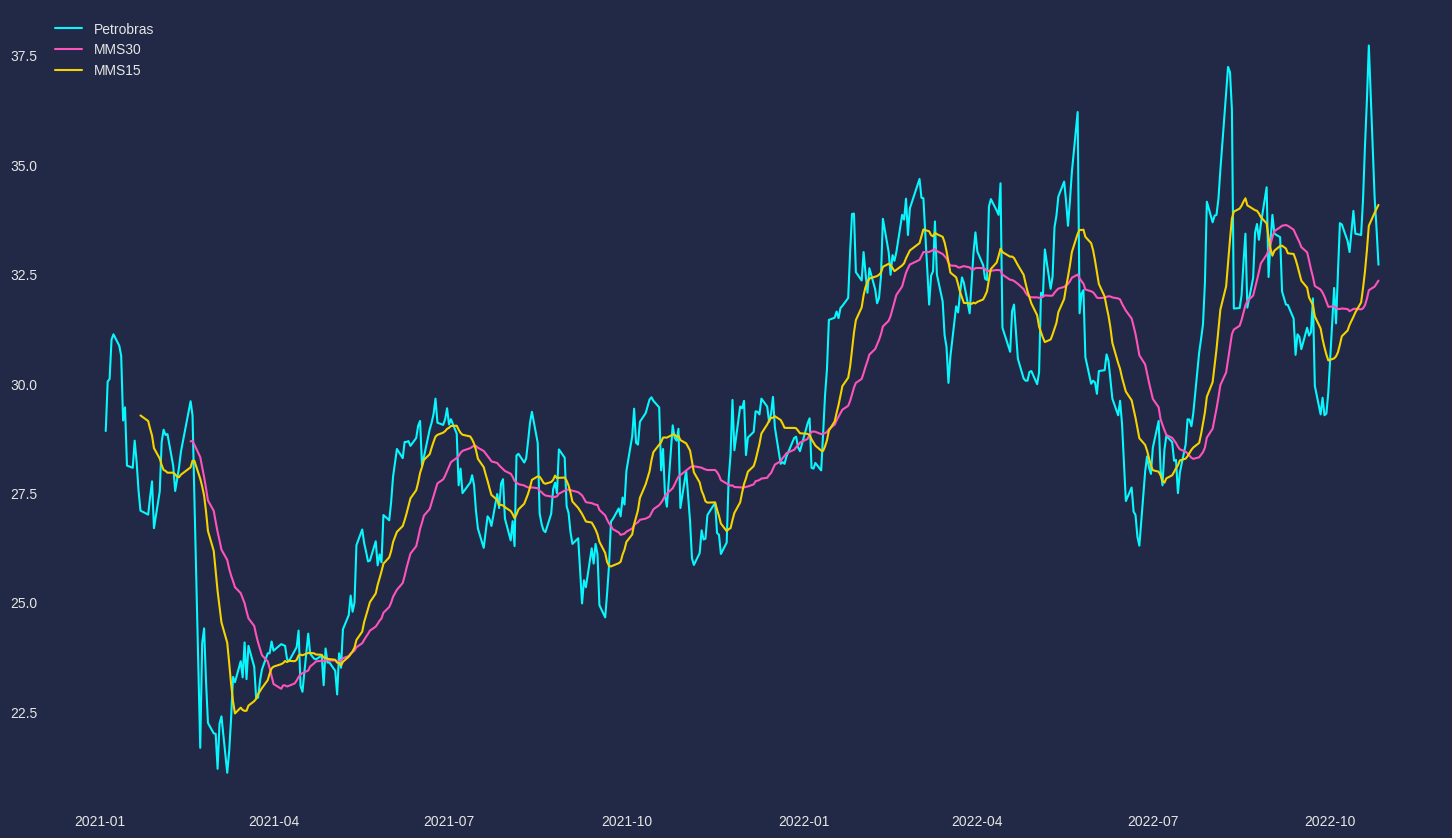

In [47]:
fig1 = plt.figure(figsize= (14, 8))

ax1 = fig1.add_axes([0, 0, 1, 1])

ax1.plot( petra_sa['Close'], label='Petrobras')
ax1.plot( petra_sa['Close'].rolling( window=30 ).mean(), label='MMS30' )
ax1.plot( petra_sa['Close'].rolling( window=15 ).mean(), label='MMS15' )

plt.style.use(style='cyberpunk')
plt.grid(False)
plt.legend()
plt.show()

In [36]:
petra_sa['MME30'] = petra_sa['Close'].ewm( span=30 ).mean()
petra_sa['MME30']

Date
2021-01-04    28.910000
2021-01-05    29.493834
2021-01-06    29.709504
2021-01-07    30.065083
2021-01-08    30.305102
                ...    
2022-10-20    32.737056
2022-10-21    33.058536
2022-10-24    33.135405
2022-10-25    33.160863
2022-10-26    33.131775
Name: MME30, Length: 453, dtype: float64

In [37]:
petra_sa = petra_sa.fillna(0)
petra_sa.head()

,High,Low,Open,Close,Volume,Adj Close,MME30
Date,,,,,,,
2021-01-04,29.18,28.530001,28.650000,28.910000,74719700.0,15.694896,28.910000
2021-01-05,30.18,28.240000,28.900000,30.040001,95181100.0,16.308359,29.493834
2021-01-06,30.90,30.049999,30.160000,30.100000,96562500.0,16.340933,29.709504
2021-01-07,31.15,30.340000,30.340000,31.000000,56171300.0,16.829531,30.065083
2021-01-08,31.76,30.350000,31.459999,31.120001,67136300.0,16.894678,30.305102


In [38]:
petra_sa = petra_sa.drop('MME30', axis=1)
petra_sa.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,29.180000,28.530001,28.650000,28.910000,74719700.0,15.694896
2021-01-05,30.180000,28.240000,28.900000,30.040001,95181100.0,16.308359
2021-01-06,30.900000,30.049999,30.160000,30.100000,96562500.0,16.340933
2021-01-07,31.150000,30.340000,30.340000,31.000000,56171300.0,16.829531
2021-01-08,31.760000,30.350000,31.459999,31.120001,67136300.0,16.894678
2021-01-11,31.059999,30.400000,30.610001,30.860001,48744700.0,16.753529
2021-01-12,31.559999,30.629999,31.120001,30.629999,65691900.0,16.628662
2021-01-13,30.860001,29.000000,30.680000,29.150000,93826600.0,15.825189
2021-01-14,29.670000,28.719999,29.170000,29.450001,50745400.0,15.988055


In [40]:
petra_sa

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,29.180000,28.530001,28.650000,28.910000,74719700.0,15.694896
2021-01-05,30.180000,28.240000,28.900000,30.040001,95181100.0,16.308359
2021-01-06,30.900000,30.049999,30.160000,30.100000,96562500.0,16.340933
2021-01-07,31.150000,30.340000,30.340000,31.000000,56171300.0,16.829531
2021-01-08,31.760000,30.350000,31.459999,31.120001,67136300.0,16.894678
...,...,...,...,...,...,...
2022-10-20,36.549999,35.770000,36.099998,36.470001,114347400.0,36.470001
2022-10-21,38.389999,36.389999,36.450001,37.720001,139601400.0,37.720001
2022-10-24,36.820000,34.230000,36.500000,34.250000,142110900.0,34.250000


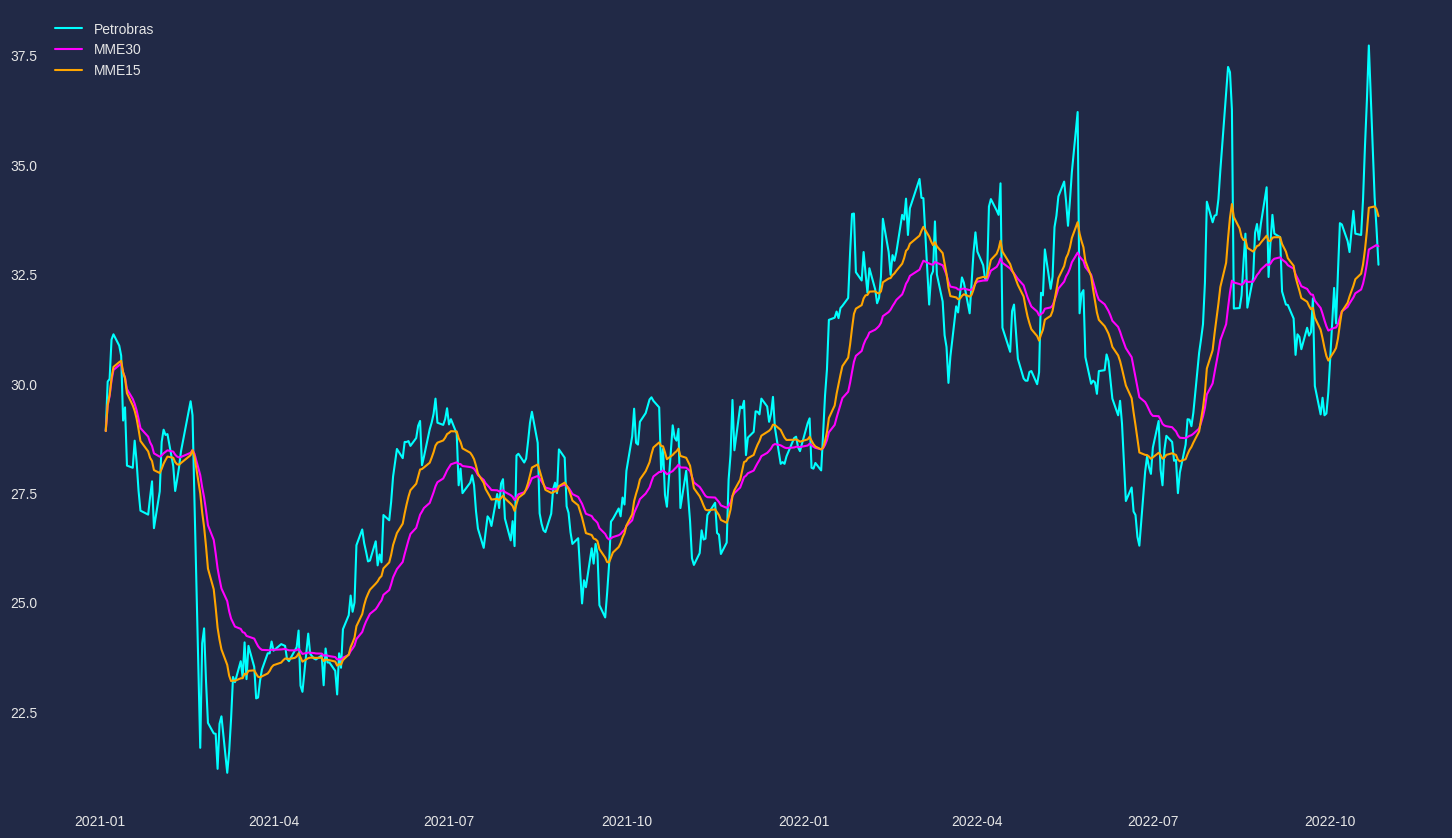

In [46]:
fig2 = plt.figure(figsize= (14, 8))

ax2 = fig2.add_axes([0, 0, 1, 1])

ax2.plot( petra_sa['Close'], label='Petrobras', color='cyan')
ax2.plot( petra_sa['Close'].ewm( span=30 ).mean(), label='MME30', color='magenta' )
ax2.plot( petra_sa['Close'].ewm( span=15 ).mean(), label='MME15', color='orange')

plt.style.use(style='cyberpunk')
plt.grid(False)
plt.legend()
plt.show()

In [49]:
# Média Móvel Simples dos ultimos 30 dias
petra_sa['MMS30'] = petra_sa['Close'].rolling( window=30 ).mean()

# Média Móvel Exponencial dos ultimos 30 dias
petra_sa['MME30'] = petra_sa['Close'].ewm( span=30 ).mean()

petra_sa = petra_sa.fillna(0)

petra_sa.tail()

,High,Low,Open,Close,Volume,Adj Close,MMS30,MME30
Date,,,,,,,,
2022-10-20,36.549999,35.770000,36.099998,36.470001,114347400.0,36.470001,31.930667,32.737056
2022-10-21,38.389999,36.389999,36.450001,37.720001,139601400.0,37.720001,32.128000,33.058536
2022-10-24,36.820000,34.230000,36.500000,34.250000,142110900.0,34.250000,32.210000,33.135405
2022-10-25,34.500000,33.209999,34.040001,33.529999,113161200.0,33.529999,32.278333,33.160863
2022-10-26,33.529999,31.900000,32.599998,32.709999,120939000.0,32.709999,32.347000,33.131775


<AxesSubplot: xlabel='Date'>

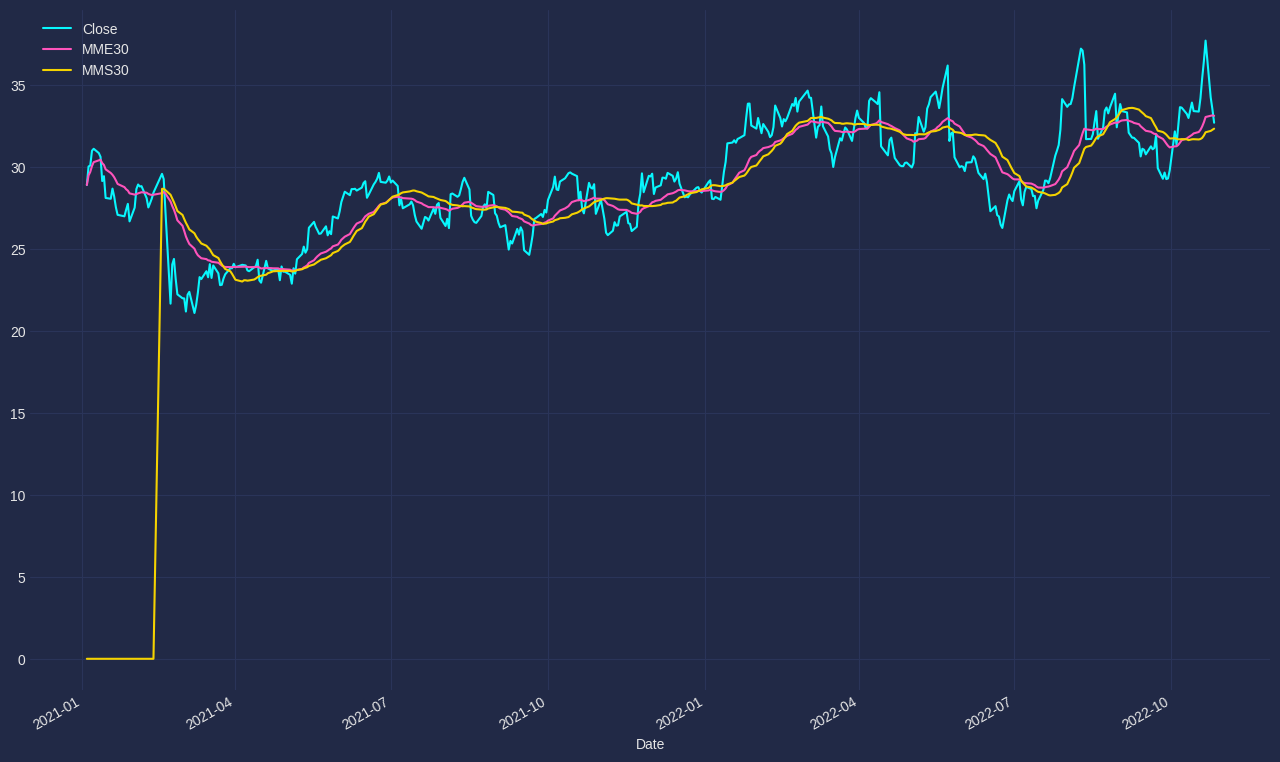

In [50]:
petra_sa[['Close', 'MME30','MMS30']].plot( figsize=(16, 10) )
petra_sa.head()